# Kanerva's Table 7.3 (page 70)

In [1]:
import sdm as sdmlib
from sdm import utils
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
%matplotlib inline

In [2]:
def run(sdm, bits, radius, max_iter=1, sample=1000000):
    for i in range(1000):
        if i%50 == 0:
            clear_output(wait=True)
            print 'Writing 1,000 random bitstrings... {}'.format(i)
        bs = sdmlib.Bitstring.init_random(bits)
        sdm.write(bs, bs)

    b = sdmlib.Bitstring.init_random(bits)
    sdm.write(b, b)

    distances = []
    x = range(0, bits+1)
    t0 = time.time()
    for i, dist in enumerate(x):
        clear_output(wait=True)
        print 'Distance: {:4d} ({:.2f}%)'.format(dist, 100.*(i+1)/len(x))
        c = sdmlib.Bitstring.init_from_bitstring(b)
        c.flip_random_bits(dist)
        assert c.distance_to(b) == dist
        d = sdm.iter_read(c, max_iter=max_iter)
        distances.append(d.distance_to(b))
    t1 = time.time()
    print 'Done! {:.2f} seconds'.format(t1-t0)
    
    return distances

In [9]:
data = []

bits = 1000
radius = utils.calculate_radius(bits)
print 'Radius: ', radius
sample = 1000000
scanner_type = sdmlib.SDM_SCANNER_OPENCL

address_space = sdmlib.AddressSpace.init_random(bits, sample)
counter = sdmlib.Counter.init_zero(bits, sample)
sdm = sdmlib.SDM(address_space, counter, radius, scanner_type)

Radius:  451


In [10]:
max_iter = 1

for i in xrange(10):
    %time distances = run(sdm, bits, radius, max_iter=max_iter, sample=sample)
    distances = [(1.0*x)/bits for x in distances]
    x = [1.0*x/bits for x in range(len(distances))]
    data.append((x, distances))

Distance: 1000 (100.00%)
Done! 17.64 seconds
CPU times: user 10.2 s, sys: 5.41 s, total: 15.6 s
Wall time: 39.6 s


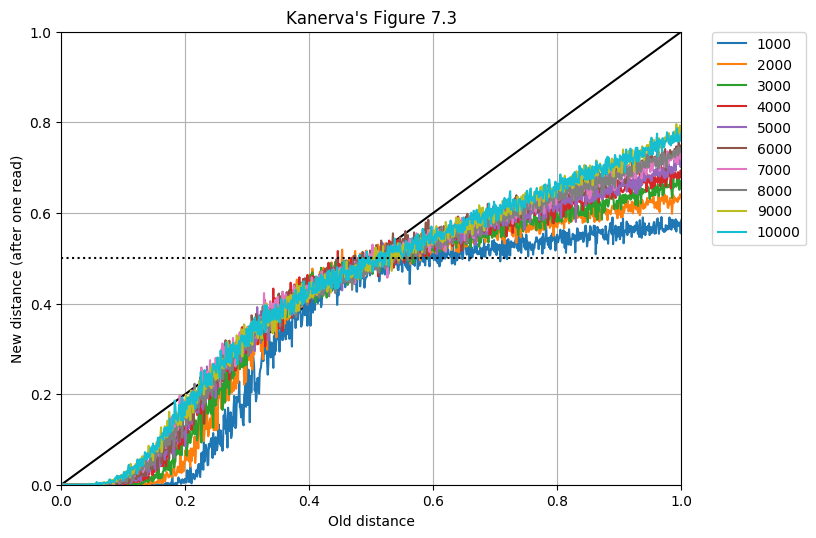

In [14]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x, x, 'k')
for i, v in enumerate(data):
    x, distances = v
    plt.plot(x, distances, label=str((i+1)*1000))
x = [1.0*x/1000 for x in range(1000)]
plt.plot(x, [0.5]*len(x), 'k:')
plt.title('Kanerva\'s Figure 7.3')
plt.ylabel('New distance (after one read)')
plt.xlabel('Old distance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.axis([0, 1, 0, 1]);

# bits

In [ ]:
bs = sdmlib.Bitstring.init_random(256)

In [ ]:
bs.to_binary()

In [ ]:
len(_34)

In [ ]:
bs.to_hex()

In [ ]:
256/4

In [ ]:
len(_36)